In [73]:
import pandas as pd
import numpy as np

# What happened?

At Friday, October 5th 2018 we tried to get our plane at 17:50 pm at Newark Airport.

You have to be at the airport on 1 hour before departure: so 16:50

We planned in lots of buffer so we were picked up by a taxi at 14:15 in Manhatten,6th avenue corner 36th street.

Guess what: we arrived at 17:05 at the airport and missed the plane.

https://www.google.com/maps/place/6th+Ave+%26+W+35th+St,+New+York,+NY+10018,+USA/@40.7504619,-73.9894728,17z/data=!3m1!4b1!4m5!3m4!1s0x89c259a9673350a3:0xa607f153af52d5ca!8m2!3d40.7504619!4d-73.9872841

# How often did it happen in 2017, that a taxi took for that too long?

In [2]:
df = pd.read_pickle('nyc-2017-yellow-taxi-trips-to-airport-expanded.pkl.gz')

In [3]:
df.dropoff_zone.cat.categories

Index(['JFK Airport', 'LaGuardia Airport', 'Newark Airport'], dtype='object')

In [4]:
def filter_trips_to_newark_airport(df):
    return df[df.dropoff_zone == 'Newark Airport']
def filter_trips_from_murray_hill(df):
    return df[df.pickup_zone == 'Murray Hill']

df1 = filter_trips_from_murray_hill(df)
df1 = filter_trips_to_newark_airport(df1)
df1.shape

(6926, 756)

In [5]:
df1.trip_duration_minutes.describe()

count    6926.000000
mean       50.134683
std        82.484907
min         0.000000
25%        33.733333
50%        41.541667
75%        52.662500
max      1439.533333
Name: trip_duration_minutes, dtype: float64

In [36]:
int(df.trip_duration_minutes.max()/15),df.trip_duration_minutes.max()

(108, 1631.45)

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt
tdm = df1.trip_duration_minutes
tdm_lt_200 = tdm[tdm < 600]

df_workdays = df1[df1.dropoff_datetime.dt.weekday <5]
tdm_workdays_tdm = df_workdays.trip_duration_minutes
tdm_workdays_tdm_lt_200 = tdm_workdays_tdm[tdm_workdays_tdm < 200]

df_weekends = df1[df1.dropoff_datetime.dt.weekday >=5]
tdm_weekends_tdm = df_weekends.trip_duration_minutes
tdm_weekends_tdm_lt_200 = tdm_weekends_tdm[tdm_weekends_tdm < 200]

In [133]:
tdm_lt_200.max()

163.98333333333332

In [134]:
range(0, 150, 15)

range(0, 150, 15)

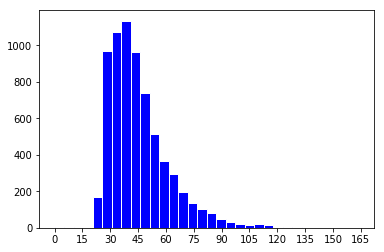

In [135]:
plt.hist(tdm_lt_200,
             
             bins=int(tdm_lt_200.max()/5), color = 'blue',
             edgecolor='white');

plt.xticks(ticks=range(0,170,15));

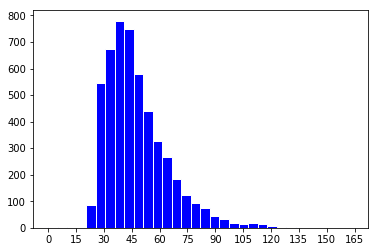

In [136]:
plt.hist(tdm_workdays_tdm_lt_200,
             bins=int(tdm_workdays_tdm_lt_200.max()/5), color = 'blue',
             edgecolor='white');
plt.xticks(ticks=range(0,170,15));

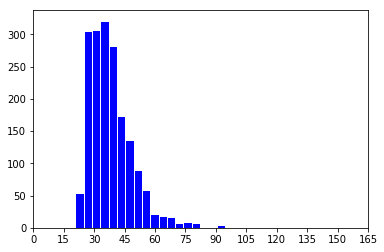

In [138]:
plt.hist(tdm_weekends_tdm_lt_200,
             bins=int(tdm_weekends_tdm_lt_200.max()/5), color = 'blue',
             edgecolor='white');
plt.xticks(ticks=range(0,170,15));

In [139]:
tdm_lt_200_q = tdm_lt_200.quantile(np.arange(0,100, 5)/100)
tdm_lt_200_q

0.00     0.000000
0.05    26.649167
0.10    28.415000
0.15    30.116667
0.20    31.980000
0.25    33.716667
0.30    35.200000
0.35    36.894167
0.40    38.466667
0.45    39.933333
0.50    41.466667
0.55    43.200000
0.60    45.040000
0.65    47.250000
0.70    49.721667
0.75    52.466667
0.80    55.983333
0.85    60.500000
0.90    66.485000
0.95    77.150833
Name: trip_duration_minutes, dtype: float64

In [140]:
tdm_workdays_tdm_lt_200_q = tdm_workdays_tdm_lt_200.quantile(np.arange(0,100, 5)/100)
tdm_workdays_tdm_lt_200_q

0.00     0.000000
0.05    27.383333
0.10    29.366667
0.15    31.810000
0.20    33.866667
0.25    35.550000
0.30    37.383333
0.35    39.116667
0.40    40.666667
0.45    42.183333
0.50    43.883333
0.55    45.816667
0.60    47.856667
0.65    50.166667
0.70    52.830000
0.75    55.933333
0.80    59.506667
0.85    64.100000
0.90    69.920000
0.95    80.586667
Name: trip_duration_minutes, dtype: float64

In [141]:
tdm_weekends_tdm_lt_200_q = tdm_weekends_tdm_lt_200.quantile(np.arange(0,100, 5)/100)
tdm_weekends_tdm_lt_200_q

0.00    20.783333
0.05    25.783333
0.10    26.916667
0.15    27.983333
0.20    29.083333
0.25    30.141667
0.30    31.433333
0.35    32.666667
0.40    33.693333
0.45    34.848333
0.50    35.916667
0.55    37.328333
0.60    38.490000
0.65    39.693333
0.70    41.313333
0.75    43.375000
0.80    45.600000
0.85    48.483333
0.90    51.460000
0.95    57.505000
Name: trip_duration_minutes, dtype: float64

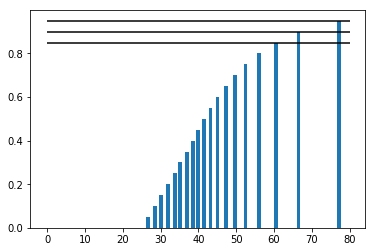

In [142]:
plt.bar(height=tdm_lt_200_q.index, x=tdm_lt_200_q.values, align='center', width=1.0);
plt.hlines(xmin=0, xmax=80, y=.95)
plt.hlines(xmin=0, xmax=80, y=.90)
plt.hlines(xmin=0, xmax=80, y=.85)

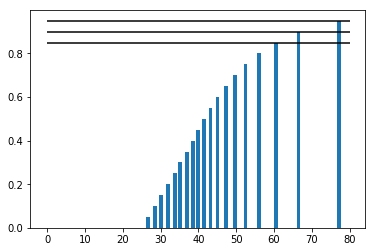

In [143]:
plt.bar(height=tdm_workdays_tdm_lt_200_q.index, x=tdm_lt_200_q.values, align='center', width=1.0);
plt.hlines(xmin=0, xmax=80, y=.95)
plt.hlines(xmin=0, xmax=80, y=.90)
plt.hlines(xmin=0, xmax=80, y=.85)

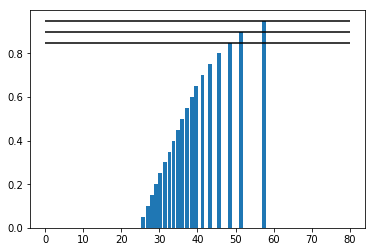

In [145]:
plt.bar(height=tdm_weekends_tdm_lt_200_q.index, x=tdm_weekends_tdm_lt_200_q.values, align='center', width=1.0);
plt.hlines(xmin=0, xmax=80, y=.95)
plt.hlines(xmin=0, xmax=80, y=.90)
plt.hlines(xmin=0, xmax=80, y=.85)

In [33]:
print("trip duration longer than 3 hours: {:.2f}%".ofrmat(100*(df1.trip_duration_minutes > 180).mean()))

AttributeError: 'str' object has no attribute 'ofrmat'

In [2]:
import matplotlib.pyplot as plt

df1.groupby(['pickup_zone']).size()

NameError: name 'df1' is not defined

In [ ]:
trips_to_newark_airport = df[df.dropoff_zone == 'Newark Airport']


In [ ]:
count_of_trips_to_ewr_per_pickup_zone = trips_to_newark_airport.groupby(['pickup_zone']).size().sort_values()
count_of_trips_to_ewr_per_pickup_zone[count_of_trips_to_ewr_per_pickup_zone > 100]

## Correlation with weekday

## Correlation with time of year

## Correlation with time of day